# Laboratory Exercise 1
## Data Value Chain, Dataset Acquisition, Organization, and Dataset Card

### Part A: Environment Setup

In [14]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

names = "Lorenzo Bela, Robert Callorina, Kean Guzon"
section = "58036"
date = "January 26 2026"

print(f"Name: {names}\nSection: {section}\nDate: {date}")
print(sys.version)

Name: Lorenzo Bela, Robert Callorina, Kean Guzon
Section: 58036
Date: January 26 2026
3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]


### Part B: Dataset Acquisition

In [15]:
train_data = torchvision.datasets.CIFAR10(root='../data/raw', train=True, download=True)
test_data = torchvision.datasets.CIFAR10(root='../data/raw', train=False, download=True)

print(len(train_data))
print(len(test_data))
print(train_data.classes)
print(train_data.data.shape)
print(train_data.data.dtype)

for i in range(5):
    img, label = train_data[i]
    print(label, train_data.classes[label], img.size)

50000
10000
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 32, 32, 3)
uint8
6 frog (32, 32)
9 truck (32, 32)
9 truck (32, 32)
4 deer (32, 32)
1 automobile (32, 32)


### Part C: Dataset Exploration Through Visual Sampling

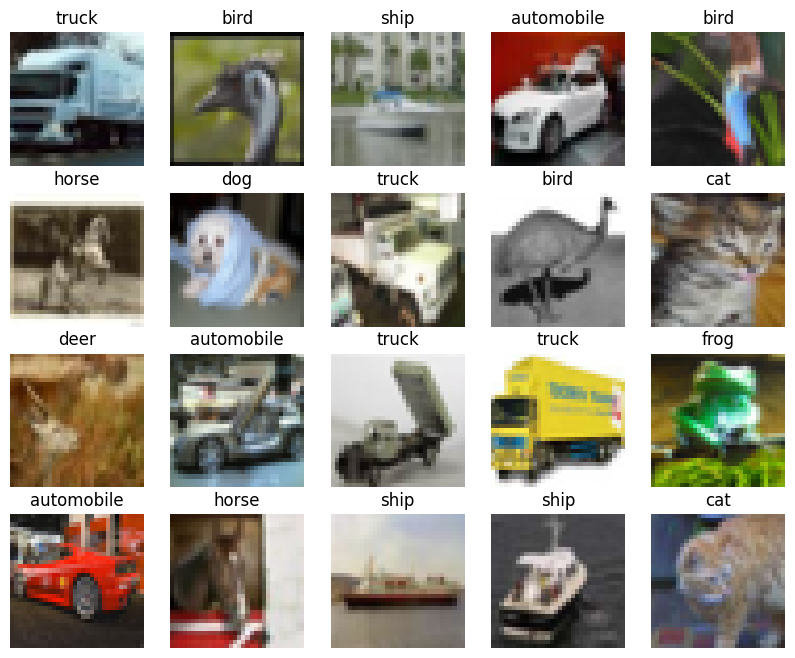

In [16]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
indices = np.random.choice(len(train_data), 20, replace=False)
for i, ax in zip(indices, axes.flat):
    img, label = train_data[i]
    ax.imshow(img)
    ax.set_title(train_data.classes[label])
    ax.axis('off')
plt.savefig('../outputs/figures/lab01_samples.png')
plt.show()

### Part D: Dataset Label Mapping and Class List

In [17]:
mapping = pd.DataFrame({'label_id': range(10), 'class_name': train_data.classes})
mapping.to_csv('../outputs/tables/lab01_label_mapping.csv', index=False)
print(mapping)

   label_id  class_name
0         0    airplane
1         1  automobile
2         2        bird
3         3         cat
4         4        deer
5         5         dog
6         6        frog
7         7       horse
8         8        ship
9         9       truck


### Part E: Class Distribution Analysis

airplane      5000
automobile    5000
bird          5000
cat           5000
deer          5000
dog           5000
frog          5000
horse         5000
ship          5000
truck         5000
Name: count, dtype: int64


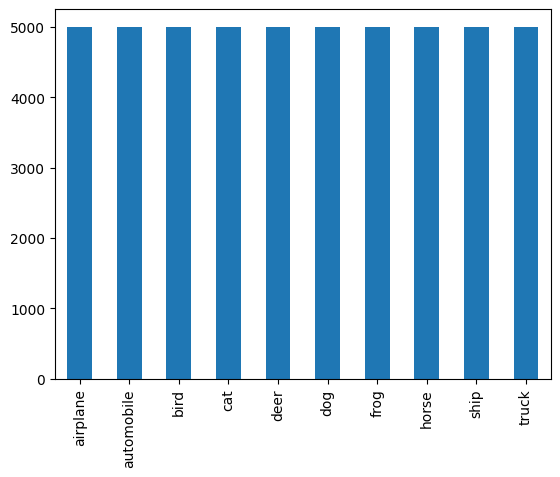

airplane airplane


In [18]:
counts = pd.Series(train_data.targets).value_counts().sort_index()
counts.index = [train_data.classes[i] for i in counts.index]
print(counts)

counts.plot(kind='bar')
plt.savefig('../outputs/figures/lab01_class_distribution.png')
plt.show()

counts.to_csv('../outputs/tables/lab01_class_distribution.csv')
print(counts.idxmax(), counts.idxmin())

### Part F: Dataset Splitting

In [19]:
total_len = len(train_data) + len(test_data)
all_indices = np.arange(total_len)
np.random.seed(42)
np.random.shuffle(all_indices)

train_split = int(0.7 * total_len)
val_split = int(0.15 * total_len)

train_idx = all_indices[:train_split]
val_idx = all_indices[train_split:train_split + val_split]
test_idx = all_indices[train_split + val_split:]

pd.DataFrame(train_idx).to_csv('../outputs/tables/train_indices.csv', index=False, header=False)
pd.DataFrame(val_idx).to_csv('../outputs/tables/val_indices.csv', index=False, header=False)
pd.DataFrame(test_idx).to_csv('../outputs/tables/test_indices.csv', index=False, header=False)